# ANALIZA NAJBOLJŠIH ROCK ALBUMOV

V tem zvezku bom analiziral podatke, ki sem jih pridobil iz spletne strani https://www.besteveralbums.com/overall.php. Pobral sem 10 000 najuspešnejših rock albumov vseh časov. Najprej moramo uvoziti pandas, da bomo lahko odprli našo csv datoteko v kateri imamo za vsak album dan naslov, izvajalca, rank na lestvici, letnico izdaje, rating na podlagi glasovanja obiskovalcev spletne strani in rank score oziroma točke. S knjižnjico matplotlib si bomo pomagali pri prikazovanju grafov.

In [23]:
import matplotlib as plt
import pandas as pd

Najprej si oglejmo našo csv datoteko, kjer so albumi razvrščeni glede na njihov rank na lestvici:

In [3]:
df = pd.read_csv("albumi.csv", index_col="rank")

In [4]:
df

,izvajalec,naslov,letnica,rank_score,rating
rank,,,,,
1,Radiohead,OK Computer,1997,73032,92
2,Pink Floyd,The Dark Side Of The Moon,1973,68457,92
3,The Beatles,Abbey Road,1969,62946,92
4,The Beatles,Revolver,1966,54951,91
5,Radiohead,In Rainbows,2007,49030,90
...,...,...,...,...,...
9996,John Coltrane,Lush Life,1961,118,50
9997,Otis Redding / The Jimi Hendrix Experience,Historic Performances Recorded At The Monterey...,1970,118,14
9998,World Party,Bang!,1993,118,24


# NAJUSPEŠNEJŠE LETO

Poglejmo si povprečje rank scora skozi leta:

In [5]:
kopija = df[["letnica", "rank_score"]].copy()

Najuspešnejše leto je bilo leto 1967 s povprečjem 2675


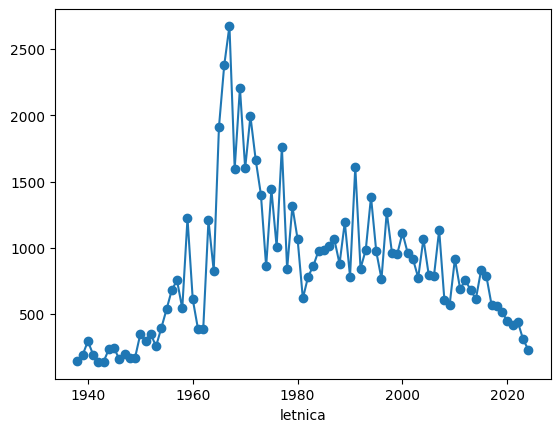

In [6]:
leto = kopija.groupby("letnica")["rank_score"].mean()
najbolse_leto = leto.idxmax()
najboljse_povprecje = leto.max()
leto.plot(x=leto.index, y=leto.values, marker='o')
print(f"Najuspešnejše leto je bilo leto {najbolse_leto} s povprečjem {round(najboljse_povprecje)}")

Moja hipoteza je bila, da bo najuspešnejše leto 1991, saj so bili takrat izdani albumi kot na primer Nevermind, Blood Sugar Sex Magik, Black album, itd. Primerjajmo leti in poglejmo zakaj je bilo leto 1967 tako dominantno:

In [19]:
leto_izdaje = 1967
df_leto = df[df['letnica'] == leto_izdaje]
print(f"Izdanih je bilo {len(df_leto)} albumov.")
df_leto.sort_values(by='rank').head(10)

Izdanih je bilo 108 albumov.


,izvajalec,naslov,letnica,rank_score,rating
rank,,,,,
8,The Beatles,Sgt. Pepper's Lonely Hearts Club Band,1967,48618,90
10,The Velvet Underground & Nico,The Velvet Underground & Nico,1967,44492,89
30,The Doors,The Doors,1967,28520,87
39,The Jimi Hendrix Experience,Are You Experienced,1967,23549,87
76,Love,Forever Changes,1967,16731,85
86,The Beatles,Magical Mystery Tour,1967,15613,86
148,Leonard Cohen,Songs Of Leonard Cohen,1967,10228,84
167,Pink Floyd,The Piper At The Gates Of Dawn,1967,9438,82
204,The Jimi Hendrix Experience,Axis: Bold As Love,1967,8016,986


In [20]:
leto_izdaje = 1991
df_leto = df[df['letnica'] == leto_izdaje]
print(f"Izdanih je bilo {len(df_leto)} albumov.")
df_leto.sort_values(by='rank').head(10)

Izdanih je bilo 142 albumov.


,izvajalec,naslov,letnica,rank_score,rating
rank,,,,,
14,Nirvana,Nevermind,1991,40892,87
22,My Bloody Valentine,Loveless,1991,32459,86
49,Pearl Jam,Ten,1991,19821,83
94,Slint,Spiderland,1991,13576,84
110,U2,Achtung Baby,1991,12694,80
135,A Tribe Called Quest,The Low End Theory,1991,10835,977
166,Talk Talk,Laughing Stock,1991,9441,759
185,Red Hot Chili Peppers,Blood Sugar Sex Magik,1991,8617,79
227,Metallica,Metallica,1991,7374,940


Poglejmo še graf kjer rank score za vsako leto samo seštejemo skupaj (ne vzamemo povprečja):

Najuspešnejše leto je bilo leto 1969 s skupno vsoto 328834


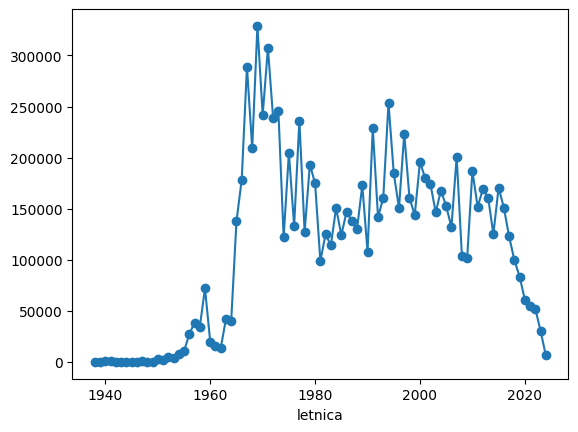

In [7]:
leto = kopija.groupby("letnica")["rank_score"].sum()
najbolse_leto = leto.idxmax()
najboljse_povprecje = leto.max()
leto.plot(x=leto.index, y=leto.values, marker='o')
print(f"Najuspešnejše leto je bilo leto {najbolse_leto} s skupno vsoto {round(najboljse_povprecje)}")

In [21]:
leto_izdaje = 1969
df_leto = df[df['letnica'] == leto_izdaje]
print(f"Izdanih je bilo {len(df_leto)} albumov.")
df_leto.sort_values(by='rank').head(10)

Izdanih je bilo 149 albumov.


,izvajalec,naslov,letnica,rank_score,rating
rank,,,,,
3,The Beatles,Abbey Road,1969,62946,92
25,King Crimson,In The Court Of The Crimson King (An Observati...,1969,30845,89
42,Led Zeppelin,Led Zeppelin II,1969,22540,87
62,The Rolling Stones,Let It Bleed,1969,18355,85
64,Led Zeppelin,Led Zeppelin,1969,18240,86
96,The Velvet Underground,The Velvet Underground,1969,13419,86
169,Nick Drake,Five Leaves Left,1969,9236,965
188,Neil Young & Crazy Horse,Everybody Knows This Is Nowhere,1969,8480,914
205,Miles Davis,In A Silent Way,1969,7978,775


Sedaj pa si poglejmo najuspešnejše izvajalce:

The Velvet Underground & Nico


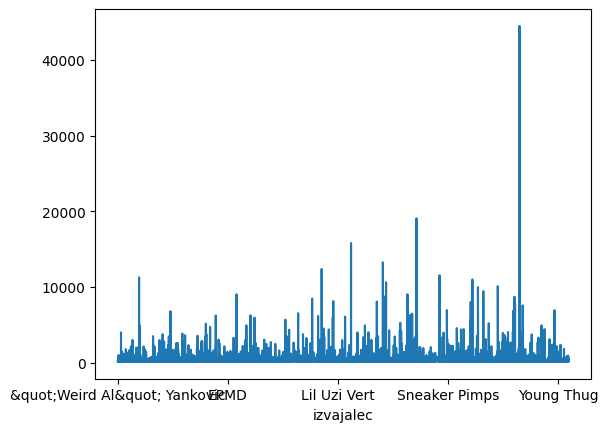

In [12]:
kopija1 = df[["izvajalec", "rank_score"]].copy()
izvajalci = kopija1.groupby("izvajalec")["rank_score"].mean()
izvajalci.plot()
najuspesnejsi = izvajalci.idxmax()
print(najuspesnejsi)


Poglejmo še vsoto:

The Beatles


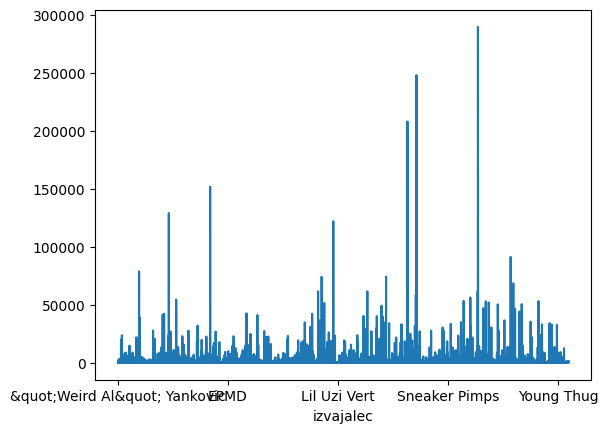

In [13]:
kopija1 = df[["izvajalec", "rank_score"]].copy()
izvajalci = kopija1.groupby("izvajalec")["rank_score"].sum()
izvajalci.plot()
najuspesnejsi = izvajalci.idxmax()
print(najuspesnejsi)

Katerega leta je bilo izdanih največ rock albumov?

Največ albumov je bilo izdanih leta 2013, skupno 236 albumov.


<Axes: xlabel='letnica'>

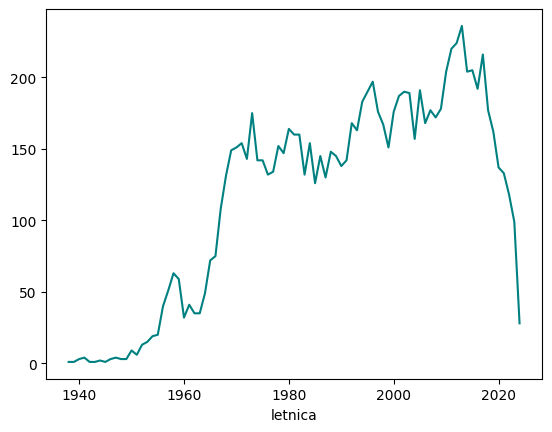

In [32]:
albumi = df['letnica'].value_counts()
idmax = albumi.idxmax()
max = albumi.max()
print(f"Največ albumov je bilo izdanih leta {idmax}, skupno {max} albumov.")
albumi.sort_index().plot(color='teal')

Vidimo lahko, da število izdanih albumov še ne pomeni, da žanr pridobiva na popularnosti.